In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

nbins = 100

zmin = 1
zmax = 5

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_Kkappa = get_f_Kkappa()

f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), nbins + 1)
chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
dchi = np.mean(np.diff(chi_bin_edges))

In [3]:
from scipy.interpolate import LinearNDInterpolator


In [4]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [5]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [6]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [7]:
unfiltered_auto = np.zeros((100, nbins, nbins))
for i in trange(nbins):
    for j in range(nbins):
        unfiltered_auto[:, i, j] = f_unfiltered_auto(chi_bin_centers[i], chi_bin_centers[j])

100%|██████████| 100/100 [00:01<00:00, 73.64it/s]


In [8]:
import matplotlib.pyplot as plt

0.0006573295599530094 0.0006573295599530094


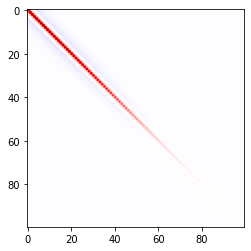

0.0006581816286799493 0.0006581816286799493


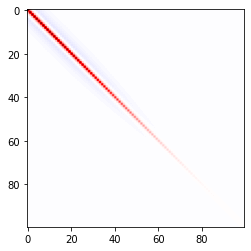

0.0006590608610203743 0.0006590608610203743


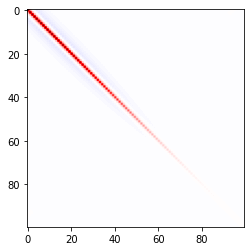

0.0006599617324256769 0.0006599617324256769


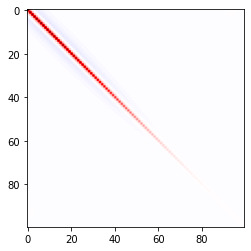

0.0006608771912654798 0.0006608771912654798


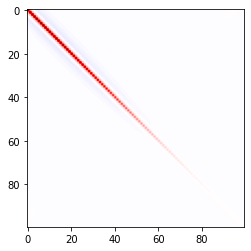

0.0006617984252257451 0.0006617984252257451


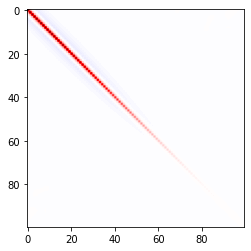

0.0006627146148477057 0.0006627146148477057


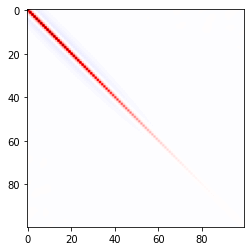

0.0006636126733756379 0.0006636126733756379


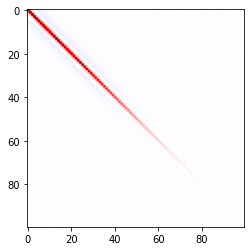

0.0006644769598742871 0.0006644769598742871


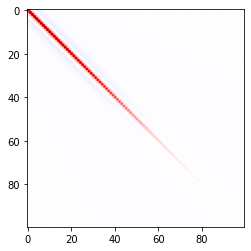

0.0006652889857123423 0.0006652889857123423


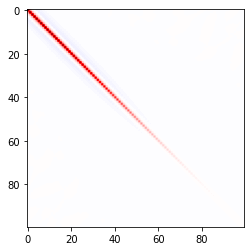

0.0006660271275045875 0.0006660271275045875


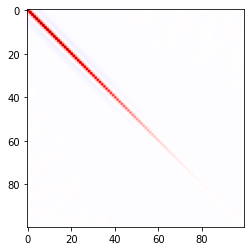

0.0006666663160500021 0.0006666663160500021


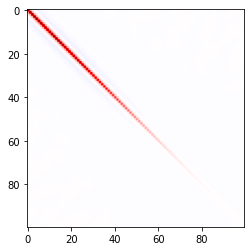

0.000667177761705343 0.000667177761705343


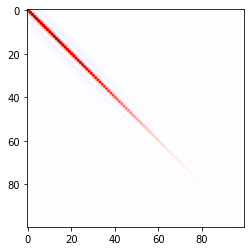

0.0006675286987378168 0.0006675286987378168


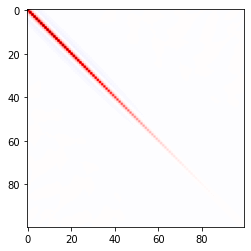

0.000667682177323165 0.000667682177323165


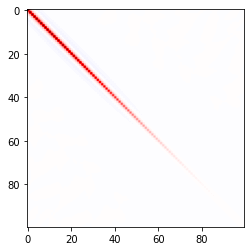

0.0006675969225981933 0.0006675969225981933


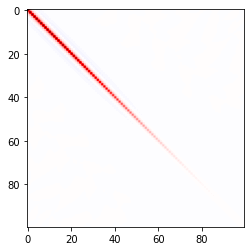

0.0006672602729826808 0.0006672602729826808


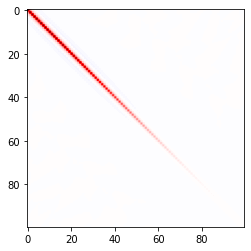

0.0006666294426965579 0.0006666294426965579


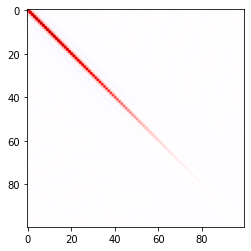

0.0006656218243452217 0.0006656218243452217


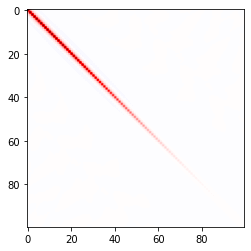

0.000664180810293943 0.000664180810293943


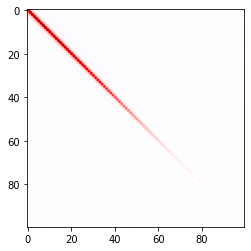

0.0006622470026616092 0.0006622470026616092


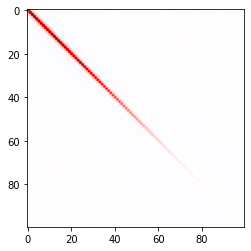

0.0006597593439780945 0.0006597593439780945


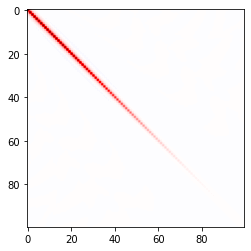

0.0006569145498522358 0.0006569145498522358


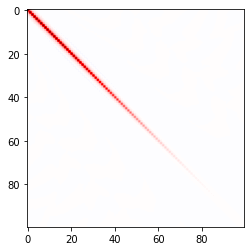

0.0006534199682906857 0.0006534199682906857


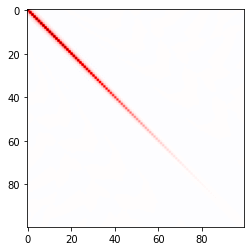

0.0006492180627094936 0.0006492180627094936


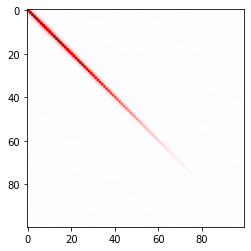

0.0006442577909435721 0.0006442577909435721


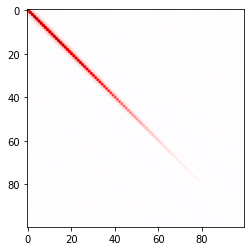

0.0006384974277646808 0.0006384974277646808


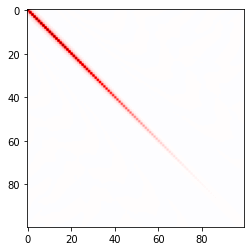

0.0006319082105052165 0.0006319082105052165


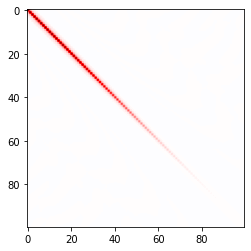

0.0006246046862068102 0.0006246046862068102


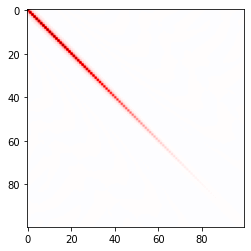

0.0006165218832125257 0.0006165218832125257


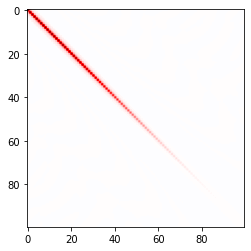

0.0006076336788975451 0.0006076336788975451


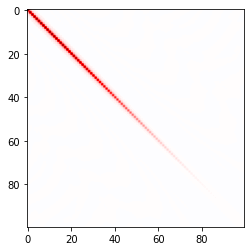

0.0005979946030011244 0.0005979946030011244


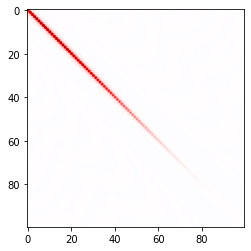

0.000587686684261213 0.000587686684261213


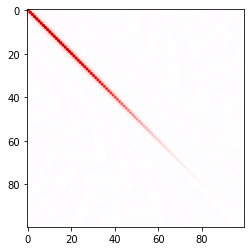

0.0005768181915945868 0.0005768181915945868


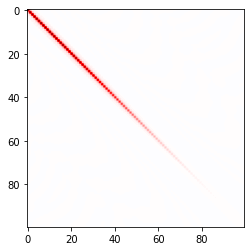

0.0005655188561870526 0.0005655188561870526


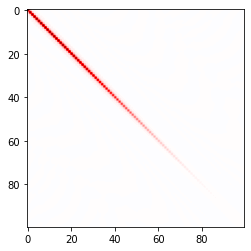

0.0005539331561572329 0.0005539331561572329


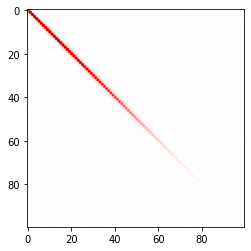

0.000542250848093928 0.000542250848093928


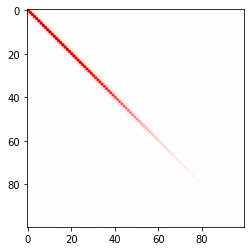

0.0005305341616189261 0.0005305341616189261


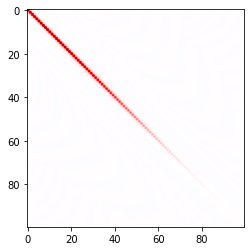

0.0005189296086638181 0.0005189296086638181


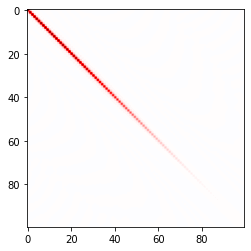

0.0005074935038163023 0.0005074935038163023


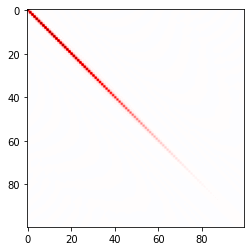

0.0004961907705448726 0.0004961907705448726


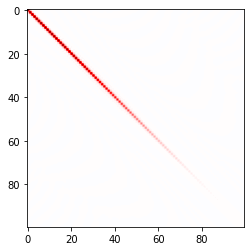

0.00048489611682306615 0.00048489611682306615


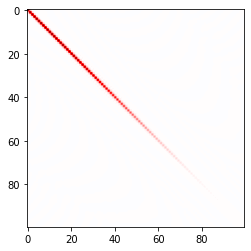

0.00047341800944452066 0.00047341800944452066


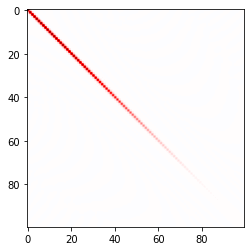

0.0004615478082117566 0.0004615478082117566


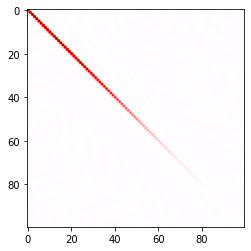

0.00044893197219307855 0.00044893197219307855


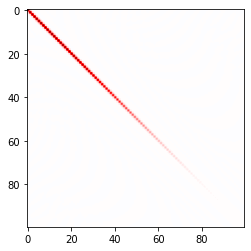

0.0004353578515206082 0.0004353578515206082


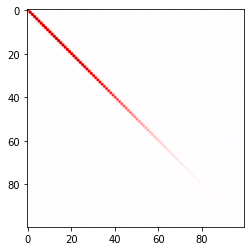

0.0004212493157738294 0.0004212493157738294


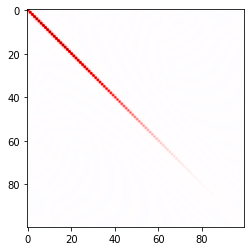

0.0004057906361680241 0.0004057906361680241


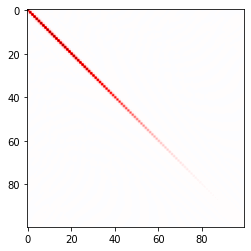

0.000389135112999881 0.000389135112999881


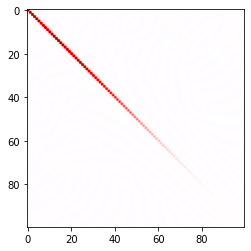

0.0003718774664059801 0.0003718774664059801


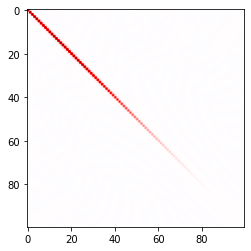

0.0003547299043752307 0.0003547299043752307


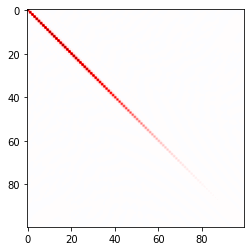

0.00033811585459770293 0.00033811585459770293


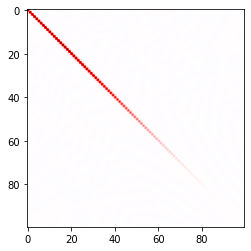

0.0003229053175703491 0.0003229053175703491


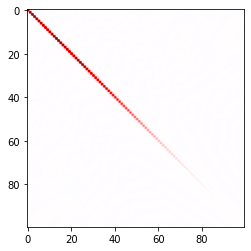

0.0003095482961792264 0.0003095482961792264


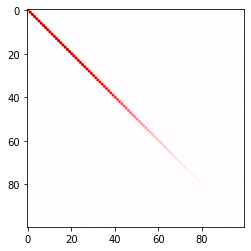

0.0002974224918850935 0.0002974224918850935


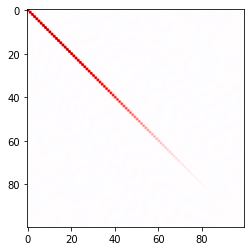

0.0002855565857456203 0.0002855565857456203


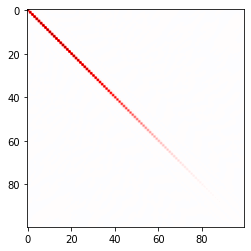

0.0002730270224374083 0.0002730270224374083


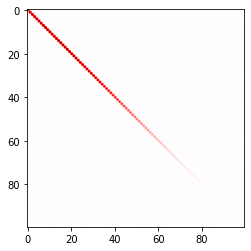

0.0002595780332609106 0.0002595780332609106


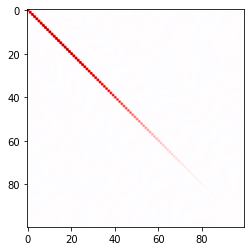

0.0002448591300779673 0.0002448591300779673


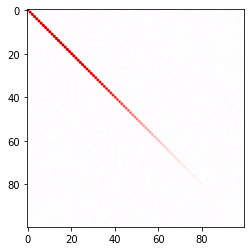

0.00023014456829303098 0.00023014456829303098


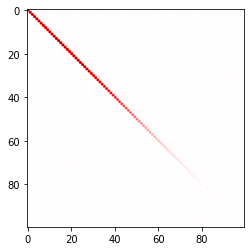

0.0002168567035282536 0.0002168567035282536


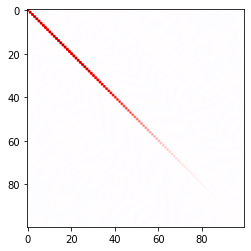

0.00020558415759454159 0.00020558415759454159


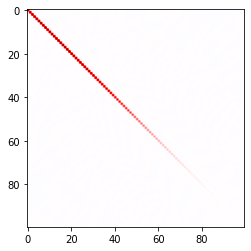

0.00019541539422127325 0.00019541539422127325


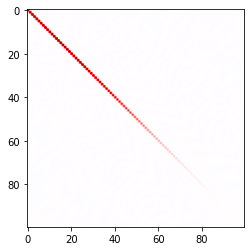

0.00018478519585126647 0.00018478519585126647


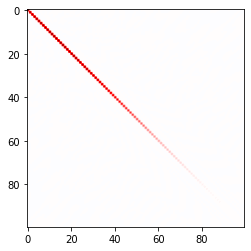

0.00017338373739088361 0.00017338373739088361


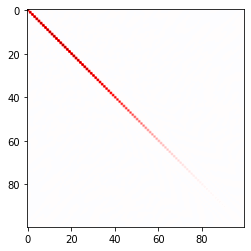

0.0001619826828345408 0.0001619826828345408


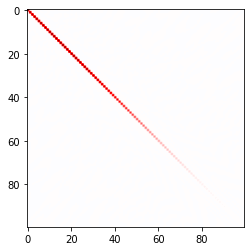

0.0001519163841704695 0.0001519163841704695


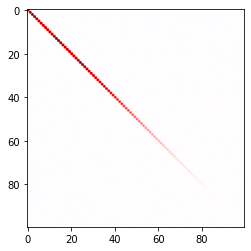

0.0001431183277501268 0.0001431183277501268


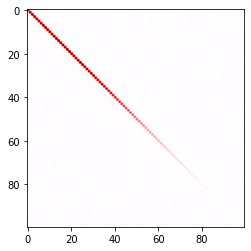

0.00013426648386556572 0.00013426648386556572


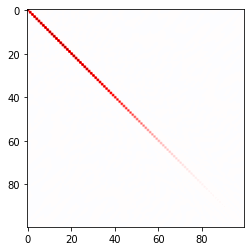

0.00012522017568262166 0.00012522017568262166


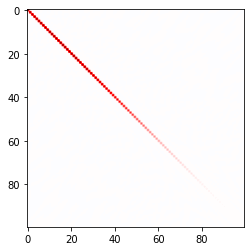

0.00011676039860787091 0.00011676039860787091


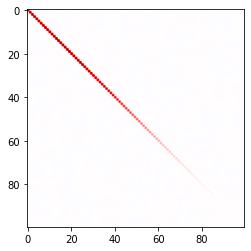

0.00010925173279759031 0.00010925173279759031


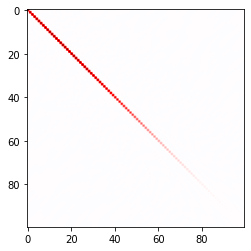

0.00010189171965075035 0.00010189171965075035


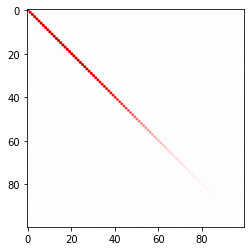

9.470874875622189e-05 9.470874875622189e-05


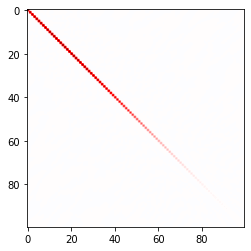

8.818601293345787e-05 8.818601293345787e-05


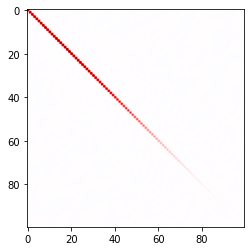

8.196135392551072e-05 8.196135392551072e-05


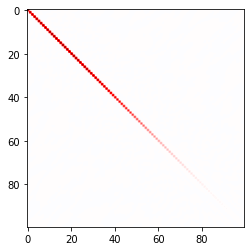

7.603439862609257e-05 7.603439862609257e-05


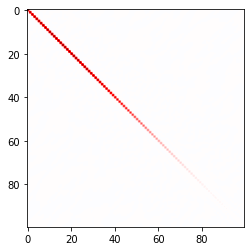

7.055140015718183e-05 7.055140015718183e-05


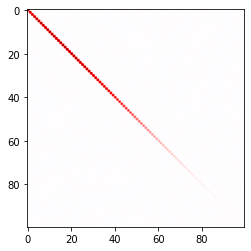

6.535280118673781e-05 6.535280118673781e-05


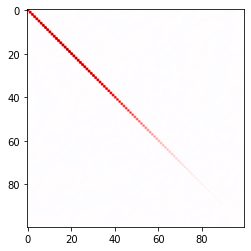

6.050418280660302e-05 6.050418280660302e-05


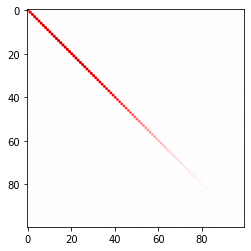

5.595968639212329e-05 5.595968639212329e-05


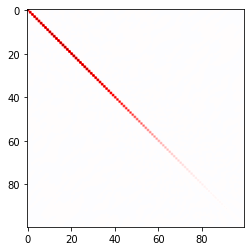

5.171018970373564e-05 5.171018970373564e-05


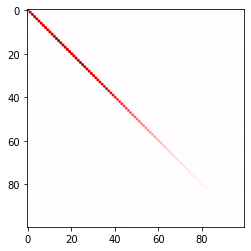

4.7740894793552614e-05 4.7740894793552614e-05


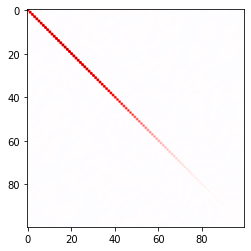

4.404032702265249e-05 4.404032702265249e-05


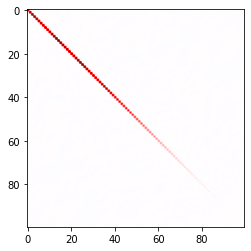

4.0591818502155754e-05 4.0591818502155754e-05


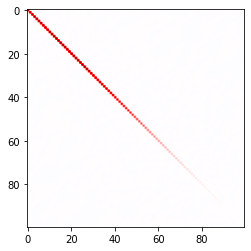

3.7381221295202235e-05 3.7381221295202235e-05


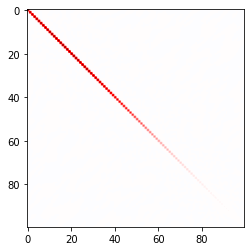

3.439735943160186e-05 3.439735943160186e-05


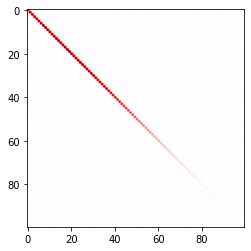

3.1631205052329936e-05 3.1631205052329936e-05


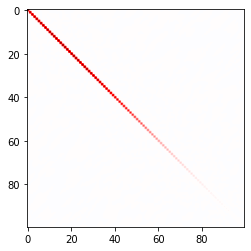

2.9067065456496795e-05 2.9067065456496795e-05


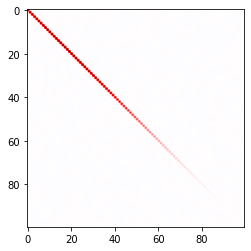

2.669136658624169e-05 2.669136658624169e-05


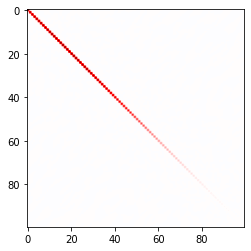

2.4492224171626424e-05 2.4492224171626424e-05


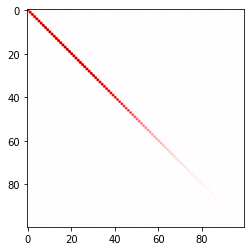

2.2458473220623624e-05 2.2458473220623624e-05


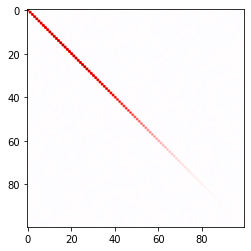

2.0579565501997704e-05 2.0579565501997704e-05


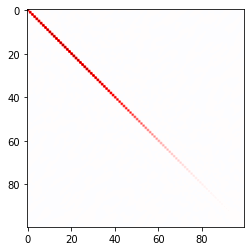

1.8846226173045596e-05 1.8846226173045596e-05


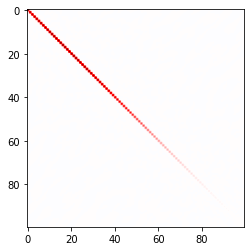

1.724890243967503e-05 1.724890243967503e-05


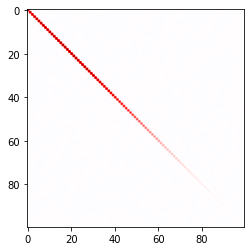

1.5777025219726892e-05 1.5777025219726892e-05


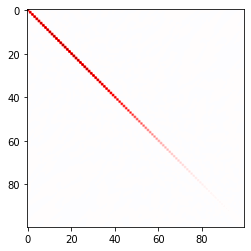

1.4421871609329406e-05 1.4421871609329406e-05


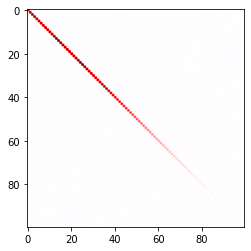

1.3175201762212201e-05 1.3175201762212201e-05


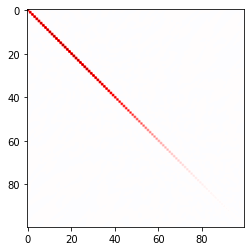

1.2029247762532243e-05 1.2029247762532243e-05


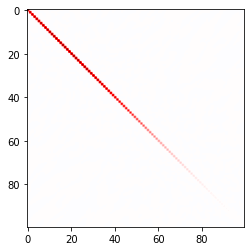

1.0976695969110027e-05 1.0976695969110027e-05


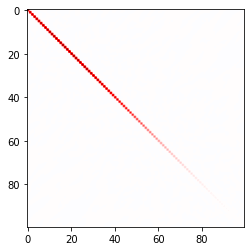

In [9]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()

In [10]:
np.save('/scratch/users/delon/LIMxCMBL/I_auto/I_auto_nbins_%d_zmin_%.1f_zmax_%.1f.npy'%(nbins, zmin, zmax), unfiltered_auto)